In [8]:
import tensorflow as tf
import os
import numpy as np
from matplotlib import pyplot as plt

In [9]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)
    print(gpu)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# Loading Data

In [10]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 6452 files belonging to 4 classes.


In [23]:
data_iterator = data.as_numpy_iterator()
data_iterator


In [101]:
batch = data_iterator.next()
batch

(array([[[[9.31372587e-03, 9.31372587e-03, 9.31372587e-03],
          [2.20588245e-03, 2.20588245e-03, 2.20588245e-03],
          [5.88235306e-03, 5.88235306e-03, 5.88235306e-03],
          ...,
          [2.62714457e-03, 2.62714457e-03, 2.62714457e-03],
          [9.78860259e-03, 7.58272037e-03, 8.68566148e-03],
          [2.35217530e-02, 1.58854164e-02, 1.96001846e-02]],
 
         [[3.55392159e-03, 3.55392159e-03, 3.55392159e-03],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [1.83823530e-03, 1.83823530e-03, 1.83823530e-03],
          ...,
          [2.01439951e-02, 2.01439951e-02, 2.01439951e-02],
          [2.02895217e-02, 1.80836394e-02, 1.91865806e-02],
          [3.77680771e-02, 2.99249385e-02, 3.38465087e-02]],
 
         [[4.28921590e-03, 4.28921590e-03, 4.28921590e-03],
          [7.84313772e-03, 7.84313772e-03, 7.84313772e-03],
          [6.00490207e-03, 6.00490207e-03, 6.00490207e-03],
          ...,
          [1.90410540e-02, 1.90410540e-02, 1.9041

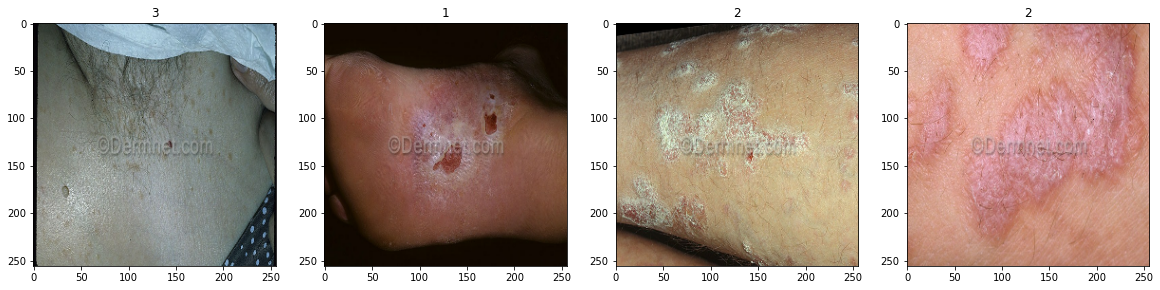

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Scale data

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()

(array([[[[2.58662671e-01, 2.03760728e-01, 1.60623461e-01],
          [3.04664522e-01, 2.31257662e-01, 1.78561583e-01],
          [2.87185967e-01, 1.87308520e-01, 1.10225186e-01],
          ...,
          [4.55139399e-01, 3.45335484e-01, 2.98276663e-01],
          [4.80828732e-01, 3.78255218e-01, 3.34015012e-01],
          [4.16467518e-01, 3.30193013e-01, 2.79212624e-01]],
 
         [[2.75053620e-01, 2.20151648e-01, 1.77014396e-01],
          [2.84091592e-01, 2.10684747e-01, 1.57988667e-01],
          [2.98651963e-01, 2.00497851e-01, 1.22840077e-01],
          ...,
          [4.14859056e-01, 3.05055141e-01, 2.57996321e-01],
          [4.15724576e-01, 3.13151032e-01, 2.68910855e-01],
          [4.01432306e-01, 3.15157771e-01, 2.64177382e-01]],
 
         [[2.88480401e-01, 2.31579348e-01, 1.89108461e-01],
          [3.04289222e-01, 2.29296878e-01, 1.77129284e-01],
          [2.67325372e-01, 1.79212630e-01, 9.82077196e-02],
          ...,
          [4.36511934e-01, 3.21852028e-01, 2.7722

# Split data

In [21]:
len(data)

202

In [16]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [27]:
train_size

141

In [28]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [29]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [30]:
test

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [31]:
val

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Model

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [85]:
model = Sequential()

In [86]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())


model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [87]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [88]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 30, 30, 64)      

In [89]:
logdir='logs'

In [90]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [91]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
141/141 [==============================] - 312s 2s/step - loss: 1.2982 - accuracy: 0.3670 - val_loss: 1.2712 - val_accuracy: 0.4062
Epoch 2/10
141/141 [==============================] - 284s 2s/step - loss: 1.2273 - accuracy: 0.4404 - val_loss: 1.2058 - val_accuracy: 0.4297
Epoch 3/10
141/141 [==============================] - 255s 2s/step - loss: 1.1636 - accuracy: 0.4716 - val_loss: 1.2343 - val_accuracy: 0.4313
Epoch 4/10
141/141 [==============================] - 257s 2s/step - loss: 1.1056 - accuracy: 0.5082 - val_loss: 1.1592 - val_accuracy: 0.4828
Epoch 5/10
141/141 [==============================] - 255s 2s/step - loss: 1.0199 - accuracy: 0.5547 - val_loss: 1.1610 - val_accuracy: 0.4891
Epoch 6/10
141/141 [==============================] - 255s 2s/step - loss: 0.8960 - accuracy: 0.6164 - val_loss: 1.2070 - val_accuracy: 0.4906
Epoch 7/10
141/141 [==============================] - 255s 2s/step - loss: 0.7626 - accuracy: 0.6831 - val_loss: 1.3303 - val_accuracy: 0.4930

# Plot Performance

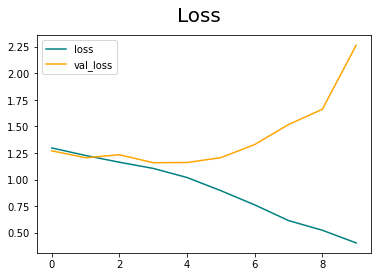

In [92]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

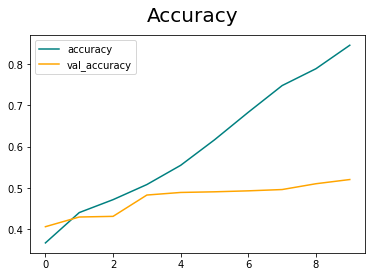

In [93]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()